In [336]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='white', palette='muted',color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px

In [337]:
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,confusion_matrix,silhouette_score 
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LinearRegression,LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

In [338]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-5-hcv.csv')
data.head(1)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0


In [339]:
mis_data = data.isna().sum() * 100/len(data)
mis_data.sort_values(ascending=False)

ALP           2.926829
CHOL          1.626016
ALB           0.162602
ALT           0.162602
PROT          0.162602
Unnamed: 0    0.000000
Category      0.000000
Age           0.000000
Sex           0.000000
AST           0.000000
BIL           0.000000
CHE           0.000000
CREA          0.000000
GGT           0.000000
dtype: float64

In [340]:
mean_impu = SimpleImputer(missing_values=np.NaN,strategy='mean')

num_val = ['ALP','CHOL','ALB','ALT','PROT']
data[num_val] = mean_impu.fit_transform(data[num_val])

In [341]:
data.isna().sum() * 100/len(data)

Unnamed: 0    0.0
Category      0.0
Age           0.0
Sex           0.0
ALB           0.0
ALP           0.0
ALT           0.0
AST           0.0
BIL           0.0
CHE           0.0
CHOL          0.0
CREA          0.0
GGT           0.0
PROT          0.0
dtype: float64

In [342]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
y = data.Category 
le = LabelEncoder()

true_labels = le.fit_transform(y)
data = pd.get_dummies(data,dtype=float)
# data

In [343]:
le.classes_ 

n_clusters = len(le.classes_)

preprocessor = Pipeline([ 
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=2,random_state=42))
])

clusterer = Pipeline( 
    [ 
        ( 
            'kmeans',
            KMeans( 
                n_clusters=n_clusters,
                init = 'k-means++',
                n_init = 50,
                max_iter =500,
                random_state=42
            )
        )
    ]
)

pipe = Pipeline( 
    [ 
        ('preprocessor',preprocessor),
        ('clusterer',clusterer)
    ]
)

pipe.fit(data)
data

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_f,Sex_m
0,32,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,32,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,32,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,32,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,32,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0
611,64,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0.0,0.0,0.0,0.0,1.0,1.0,0.0
612,64,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
613,46,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [344]:
preprocessed_data = pipe['preprocessor'].transform(data)
predicted_labels = pipe['clusterer']['kmeans'].labels_
silhouette_score(preprocessed_data,predicted_labels)

0.945683640137728

In [345]:
data['predicted_labels'] = predicted_labels
data

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_f,Sex_m,predicted_labels
0,32,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,32,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,32,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,32,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,32,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
611,64,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
612,64,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
613,46,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3


In [346]:
# data.drop(columns=['predicted_labels'],axis=1,inplace=True)

# pcdaf = pd.DataFrame( 
#     preprocessed_data,columns=['compon1','component_2']
# )
# pcdaf['predicted_cluster'] = predicted_labels
# pcdaf['true_label'] = le.inverse_transform(true_labels)

# plt.figure(figsize=(8,8))

# sct = sns.scatterplot( 
#     x='compon1',
#     y='component_2',
#     s=100,
#     data=pcdaf,
#     hue='predicted_cluster',
#     style='true_label',
#     palette='Set2',
# )
# plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.0)

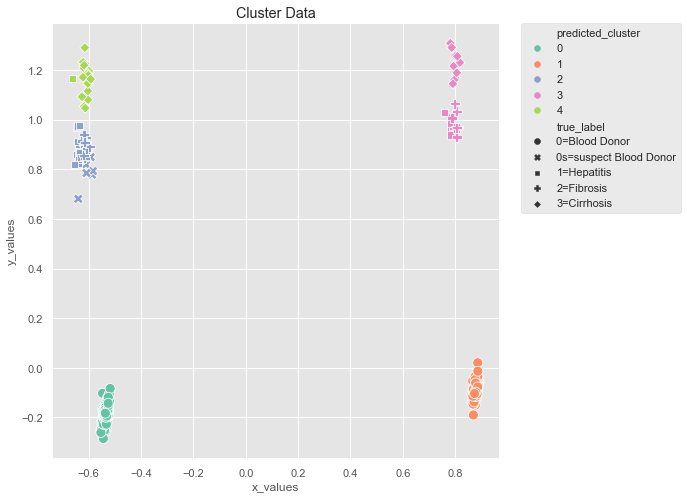

In [347]:

data.drop(columns=['predicted_labels'],axis=1,inplace=True)
data

pcdaf = pd.DataFrame( 
    preprocessed_data, columns=['x_values', 'y_values']
)

pcdaf['predicted_cluster'] = predicted_labels 
pcdaf['true_label'] = le.inverse_transform(true_labels)

plt.figure(figsize=(8,8))
scat = sns.scatterplot( 
    x = 'x_values',
    y = 'y_values',
    s=100,
    data=pcdaf,
    hue='predicted_cluster',
    style='true_label',
    palette='Set2'
)
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.0)
scat.set_title('Cluster Data')
plt.show()